## Data Visualization for Cancer_b Dataset

## Step 1: Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Step 2: Load Dataset

In [5]:
datasets = pd.read_csv('../Datasets/cancer_b.csv')
datasets.head()

,Id,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
0,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


## Step 3: Check Data Summary

In [6]:
# Check basic statistics
print(datasets.describe())

# Check for missing values
print(datasets.isnull().sum())


                 Id  Radius (mean)  Texture (mean)  Perimeter (mean)  \
count  3.570000e+02     357.000000      357.000000        357.000000   
mean   2.654382e+07      12.146524       17.914762         78.075406   
std    1.167397e+08       1.780512        3.995125         11.807438   
min    8.913000e+03       6.981000        9.710000         43.790000   
25%    8.746620e+05      11.080000       15.150000         70.870000   
50%    9.089160e+05      12.200000       17.390000         78.180000   
75%    8.812816e+06      13.370000       19.760000         86.100000   
max    9.113205e+08      17.850000       33.810000        114.600000   

       Area (mean)  Smoothness (mean)  Compactness (mean)  Concavity (mean)  \
count   357.000000         357.000000          357.000000        357.000000   
mean    462.790196           0.092478            0.080085          0.046058   
std     134.287118           0.013446            0.033750          0.043442   
min     143.500000           0.0526

## Step 4: Visualize Class Distribution

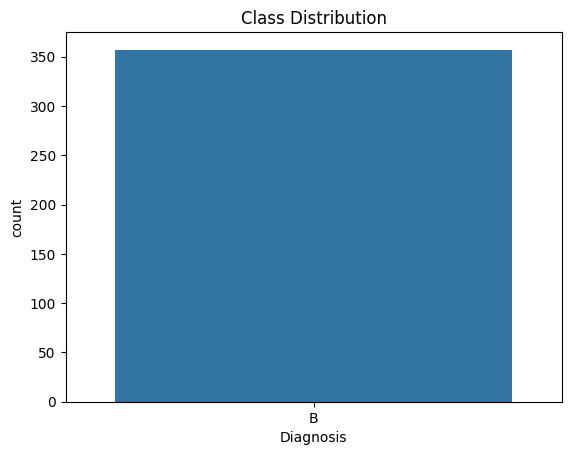

In [7]:
sns.countplot(x='Diagnosis', data=datasets)
plt.title('Class Distribution')
plt.show()

## Step 5: Visualize Feature Distributions

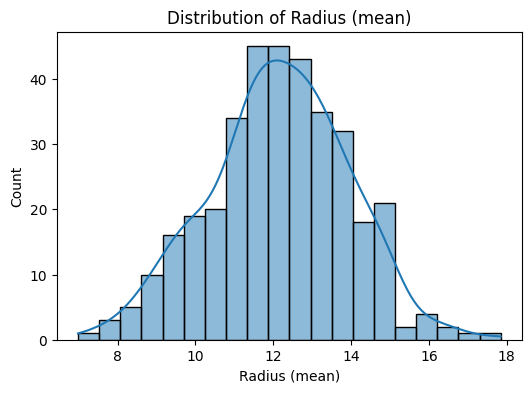

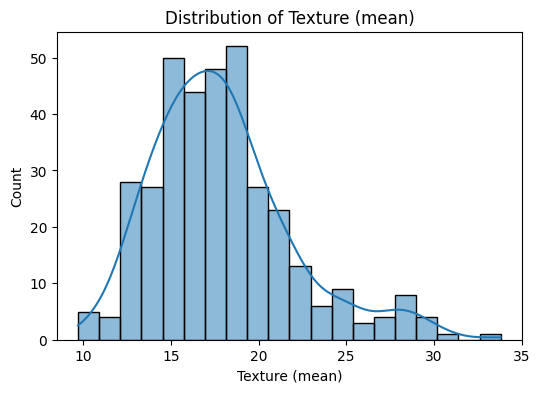

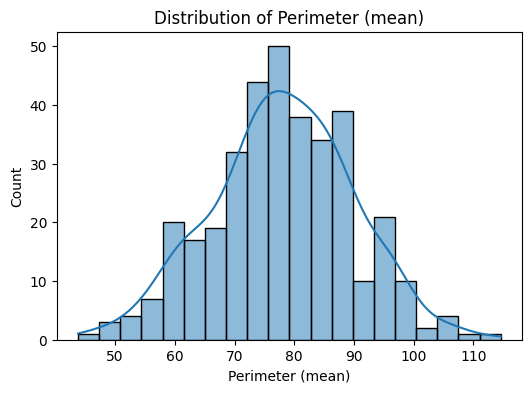

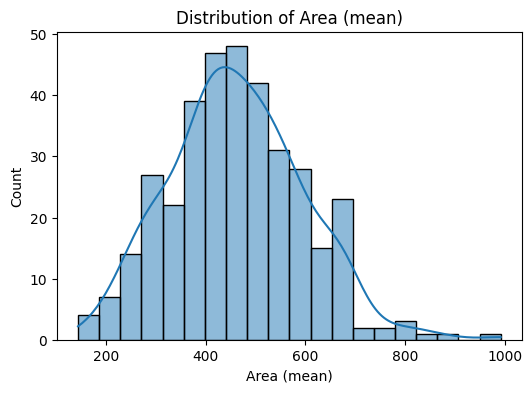

In [8]:
features = ['Radius (mean)', 'Texture (mean)', 'Perimeter (mean)', 'Area (mean)']

for feature in features:
    plt.figure(figsize=(6,4))
    sns.histplot(datasets[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.show()


## Step 6: Pairplot for Relationships

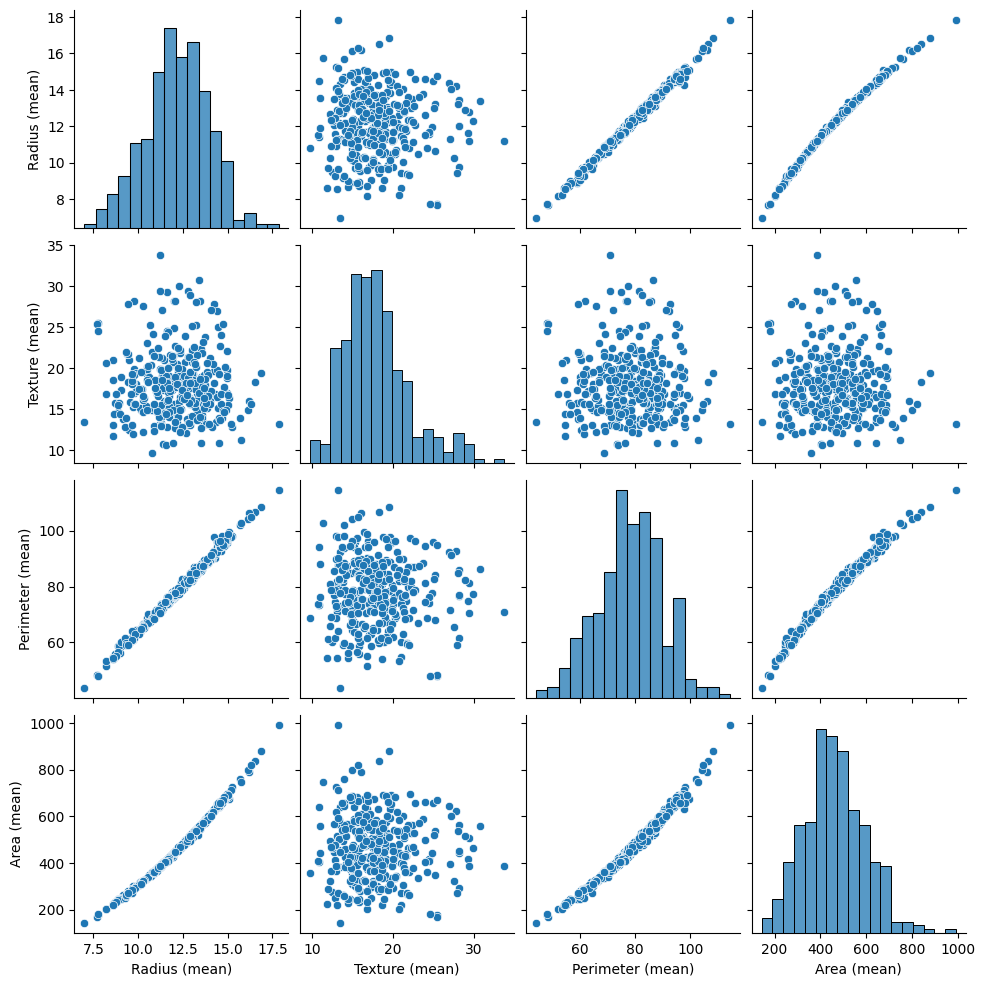

In [9]:
sns.pairplot(datasets[features])
plt.show()


## Step 7: Correlation Heatmap

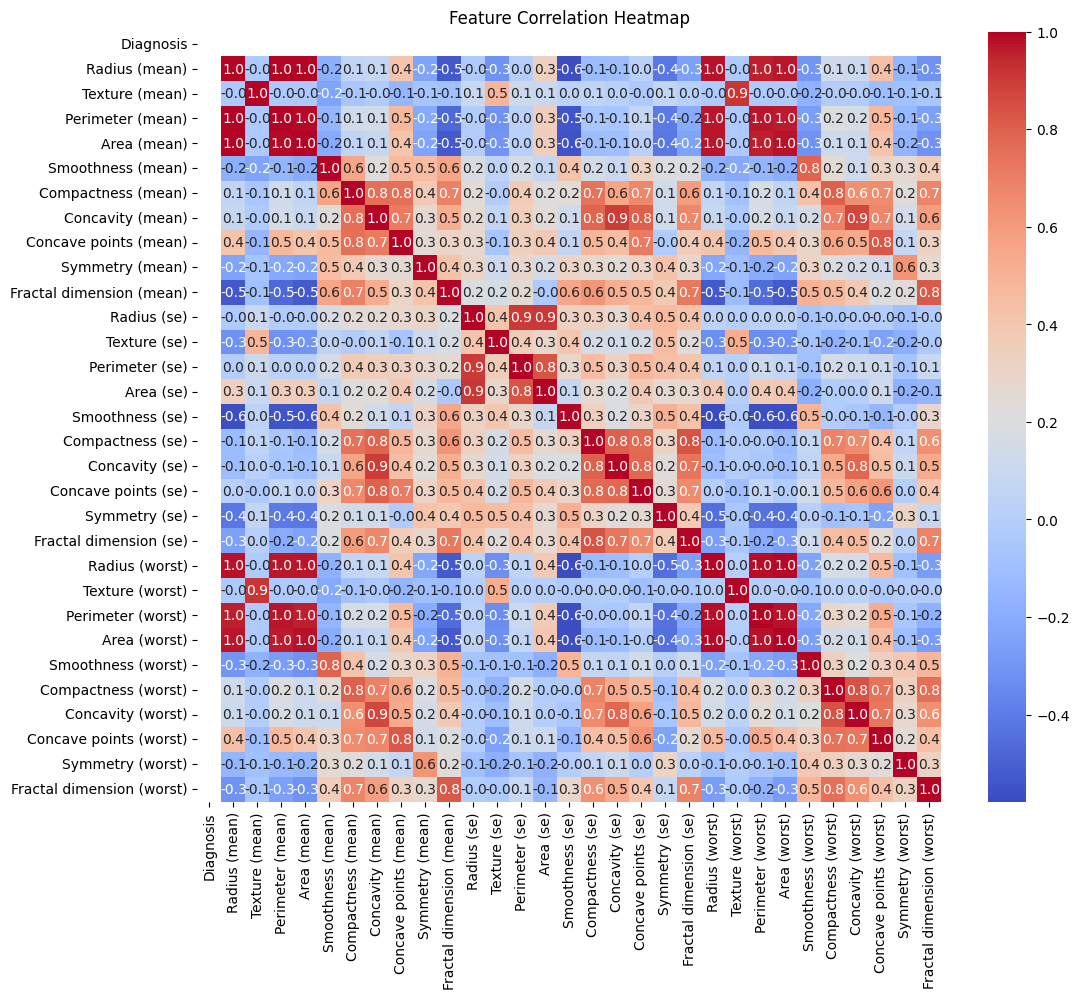

In [12]:
from sklearn.preprocessing import LabelEncoder

# Copy dataset
df = datasets.copy()

# Convert Diagnosis to numeric (B=0, M=1)
le = LabelEncoder()
df['Diagnosis'] = le.fit_transform(df['Diagnosis'])

# Drop Id before correlation
corr = df.drop('Id', axis=1).corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


## Step 8: Boxplots for Features

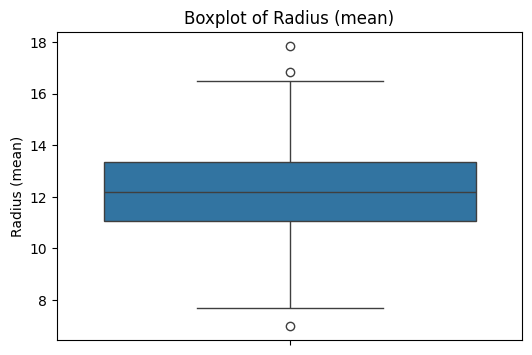

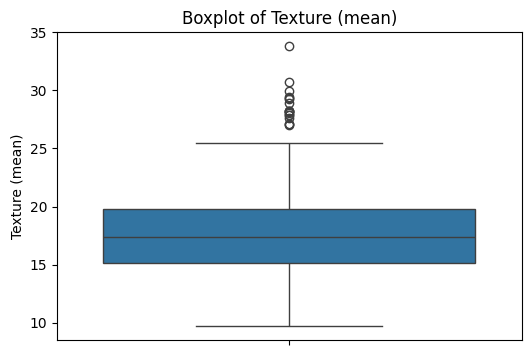

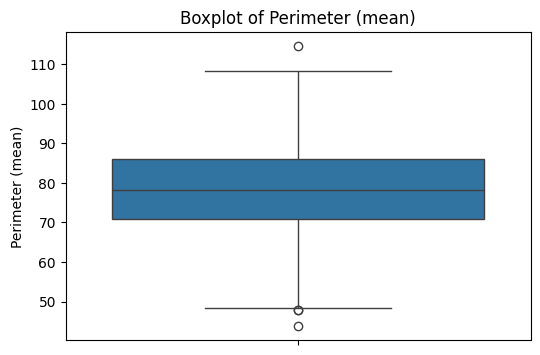

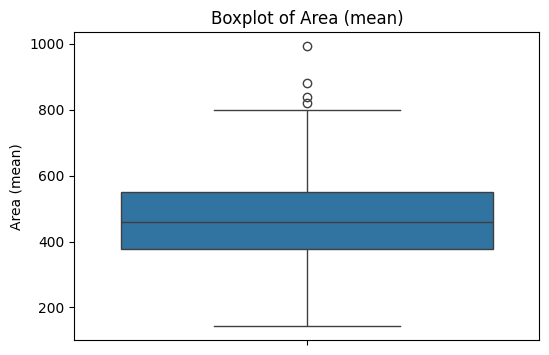

In [13]:
for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=datasets[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()
